# 01 Random agent baseline

#### 👉Before you try to solve a Reinforcement Learning problem you should get a grasp of its difficulty.

#### 👉 To do so, you need to design a dummy agent that can peform the task without much brains, and evaluate its performance.

#### 👉A simple way to do so is by using a Random Agent, that chooses its next action randomly, without paying attention at the current state of the environment.

In [29]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [30]:
import gym
env = gym.make('MountainCar-v0', render_mode='rgb_array')
env._max_episode_steps = 1000


## Random agent 🤖🍷

In [31]:
# If this import fails, run this in your shell and relaunch jupyter:
# `export PYTHONPATH=".."`
from random_agent import RandomAgent
agent = RandomAgent(env)

from loops import evaluate
n_episodes = 100
rewards, max_positions = evaluate(agent, env, n_episodes)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\Ploita\anaconda3\envs\HandsOnRL\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
100%|██████████| 100/100 [00:04<00:00, 24.57it/s]


## And the success rate is... bad...

In [32]:
n_completed = sum([1 if m > 0.5 else 0 for m in max_positions])
print(f'{n_completed} success out of {n_episodes} attempts')

0 success out of 100 attempts


## Let's see how far we got in each attempt

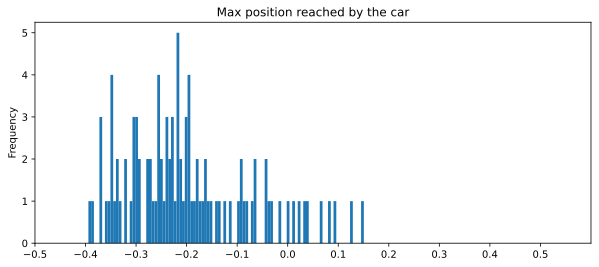

In [33]:
import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Max position reached by the car")    
ax.set(xlim=(-0.5, 0.6), xticks=np.arange(-0.5, 0.6, 0.1))
pd.Series(max_positions).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

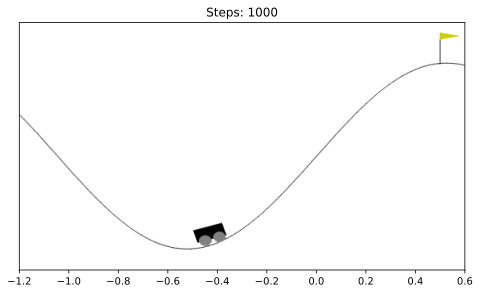

In [28]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

from viz import show_video

show_video(agent, env, sleep_sec=0.001)